In [1]:
from google.colab import drive
drive.mount('/content/drive')


# get the images https://drive.google.com/open?id=1KALHmkW8Jt0cpqz6elvtbulEG_I_GZDJ
# get the csv 0,1 (up down) here : https://drive.google.com/open?id=1HGXKO6r6NY5nf7G9mja69NIR7NZSL9Ed

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**I know this needs to be tweaked, just the raw data eh! and a very little training and tweaking**

In [2]:
cd /

/


In [3]:
cd /content/drive/My\ Drive/'Colab Notebooks'/PONG/AI

/content/drive/My Drive/Colab Notebooks/PONG/AI


In [4]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import cv2
import time

Using TensorFlow backend.


In [0]:
#!unzip images.zip

In [6]:
ls

 actions.csv                        'Pong_Fri May  3 07:24:28 2019.h5'
 images/                            'Pong_Fri May  3 07:30:39 2019.h5'
 images.zip                         'sigmoid_cnn_pongai (1).ipynb'
'Pong_Fri May  3 07:13:11 2019.h5'   sigmoid_cnn_pongai.ipynb
'Pong_Fri May  3 07:19:41 2019.h5'


In [7]:
from tqdm import tqdm

X = []
Y = []

with open ('actions.csv', 'r') as f:
    for line in f:
        Y.append(line.rstrip())


all_images = []
img_num = 0

#while tqdm(img_num < 30000): #3000 denotes the total no of input images
print("LOADING IMAGES! please wait...")


for img_num in tqdm(range(2000)):
  img = cv2.imread('images/frame_{0}.jpg'.format(img_num), cv2.IMREAD_GRAYSCALE)
  img = img[:, :, np.newaxis]
  all_images.append(img)
  img_num += 1
        

X = np.array(all_images)


  0%|          | 0/2000 [00:00<?, ?it/s]

LOADING IMAGES! please wait...


100%|██████████| 2000/2000 [06:47<00:00,  5.77it/s]


In [14]:
print(Y)

['0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1',

In [0]:
MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.02, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1960 samples, validate on 40 samples
Epoch 1/10
1960/1960 [==============================] - 7s 3ms/step - loss: 0.7116 - acc: 0.5923 - val_loss: 0.5394 - val_acc: 0.7500
Epoch 2/10
1960/1960 [==============================] - 1s 475us/step - loss: 0.5818 - acc: 0.6760 - val_loss: 0.4856 - val_acc: 0.8250
Epoch 3/10
1960/1960 [==============================] - 1s 475us/step - loss: 0.5030 - acc: 0.7684 - val_loss: 0.3633 - val_acc: 0.8500
Epoch 4/10
1960/1960 [==============================] - 1s 473us/step - loss: 0.4564 - acc: 0.7954 - val_loss: 0.3468 - val_acc: 0.8750
Epoch 5/10
1960/1960 [==============================] - 1s 469us/step - loss: 0.4303 - acc: 0.8184 - val_loss: 0.3505 - val_acc: 0.8500
Epoch 6/10
1960/1960 [===================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


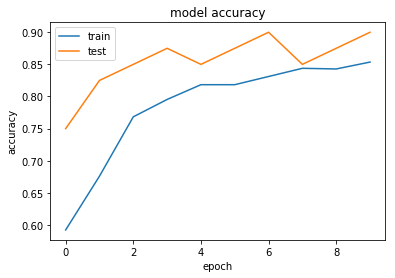

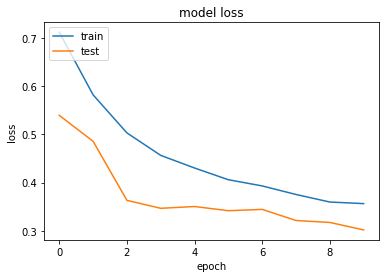

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:

from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 3
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
# batch size = 16, 32
# categorical cross entropy
# nestrov = False
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=8,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

model.save(MODEL_NAME)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 3s 2ms/step - loss: 0.1793 - acc: 0.5012 - val_loss: 0.1676 - val_acc: 0.5125
Epoch 2/30
1600/1600 [==============================] - 2s 953us/step - loss: 0.1685 - acc: 0.5231 - val_loss: 0.1668 - val_acc: 0.5125
Epoch 3/30
1600/1600 [==============================] - 2s 967us/step - loss: 0.1692 - acc: 0.4938 - val_loss: 0.1660 - val_acc: 0.5125
Epoch 4/30
1600/1600 [==============================] - 2s 951us/step - loss: 0.1680 - acc: 0.5194 - val_loss: 0.1645 - val_acc: 0.5125
Epoch 5/30
1600/1600 [==============================] - 2s 941us/step - loss: 0.1639 - acc: 0.5563 - val_loss: 0.1507 - val_acc: 0.7550
Epoch 6/30
1600/1600 [==============================] - 2s 940us/step - loss: 0.1488 - acc: 0.6719 - val_loss: 0.1262 - val_acc: 0.7375
Epoch 7/30
1600/1600 [==============================] - 2s 947us/step - loss: 0.1452 - acc: 0.6669 - val_loss: 0.1237 - val_acc: 0.7350
Epo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


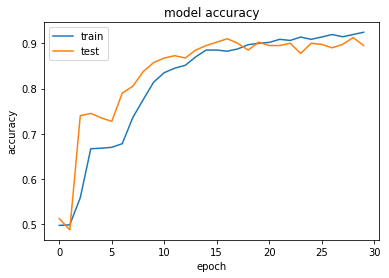

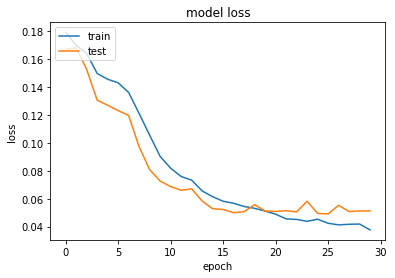

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

In [0]:
print(MODEL_NAME)

Pong_Fri May  3 06:17:50 2019.h5


In [0]:


from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model



In [22]:
print(x_train.shape[1:])
print(y_train.shape[1:])
print(len(y_train))
print(len(x_train))

(64, 64, 1)
(2,)
1600
1600


Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 3s 2ms/step - loss: 0.2497 - acc: 0.5038 - val_loss: 0.2475 - val_acc: 0.5125
Epoch 2/30
1600/1600 [==============================] - 2s 979us/step - loss: 0.2418 - acc: 0.6063 - val_loss: 0.2068 - val_acc: 0.7325
Epoch 3/30
1600/1600 [==============================] - 2s 970us/step - loss: 0.2185 - acc: 0.6619 - val_loss: 0.1881 - val_acc: 0.7400
Epoch 4/30
1600/1600 [==============================] - 2s 977us/step - loss: 0.2114 - acc: 0.6644 - val_loss: 0.1775 - val_acc: 0.7350
Epoch 5/30
1600/1600 [==============================] - 2s 968us/step - loss: 0.1937 - acc: 0.7113 - val_loss: 0.1525 - val_acc: 0.7925
Epoch 6/30
1600/1600 [==============================] - 2s 975us/step - loss: 0.1631 - acc: 0.7744 - val_loss: 0.1339 - val_acc: 0.8100
Epoch 7/30
1600/1600 [==============================] - 2s 969us/step - loss: 0.1361 - acc: 0.8081 - val_loss: 0.1066 - val_acc: 0.8525
Epo

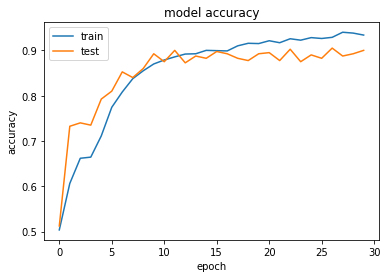

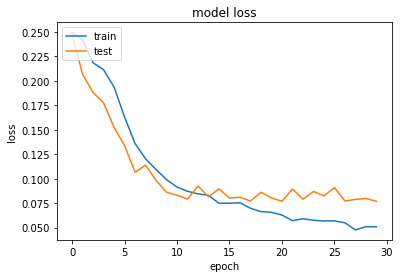

In [35]:

from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
# batch size = 16, 32
# categorical cross entropy
# nestrov = False
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
history = model.fit(x_train, y_train,
              batch_size=8,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16
#save weights post training
model.save(MODEL_NAME)

In [36]:
print(MODEL_NAME)

Pong_Fri May  3 08:57:29 2019.h5


In [28]:
from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
# batch size = 16, 32
# categorical cross entropy
# nestrov = False
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=16,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training


Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2498 - acc: 0.5187 - val_loss: 0.2484 - val_acc: 0.6650
Epoch 2/30
1600/1600 [==============================] - 1s 614us/step - loss: 0.2488 - acc: 0.5363 - val_loss: 0.2462 - val_acc: 0.7125
Epoch 3/30
1600/1600 [==============================] - 1s 609us/step - loss: 0.2446 - acc: 0.6262 - val_loss: 0.2356 - val_acc: 0.7125
Epoch 4/30
1600/1600 [==============================] - 1s 612us/step - loss: 0.2277 - acc: 0.6538 - val_loss: 0.1921 - val_acc: 0.7300
Epoch 5/30
1600/1600 [==============================] - 1s 611us/step - loss: 0.2150 - acc: 0.6644 - val_loss: 0.1915 - val_acc: 0.7550
Epoch 6/30
1600/1600 [==============================] - 1s 609us/step - loss: 0.2073 - acc: 0.6756 - val_loss: 0.1757 - val_acc: 0.7450
Epoch 7/30
1600/1600 [==============================] - 1s 610us/step - loss: 0.1934 - acc: 0.7087 - val_loss: 0.1573 - val_acc: 0.7975
Epo

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


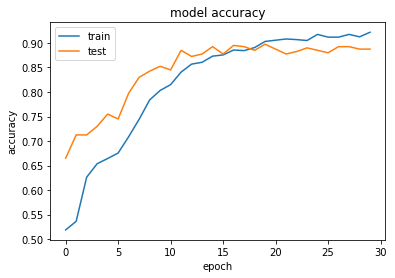

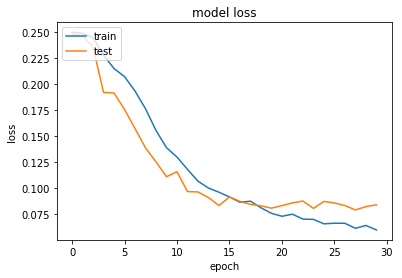

In [29]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2499 - acc: 0.5112 - val_loss: 0.2495 - val_acc: 0.4950
Epoch 2/30
1600/1600 [==============================] - 1s 464us/step - loss: 0.2495 - acc: 0.5238 - val_loss: 0.2491 - val_acc: 0.4875
Epoch 3/30
1600/1600 [==============================] - 1s 463us/step - loss: 0.2490 - acc: 0.5294 - val_loss: 0.2482 - val_acc: 0.6575
Epoch 4/30
1600/1600 [==============================] - 1s 468us/step - loss: 0.2482 - acc: 0.6225 - val_loss: 0.2469 - val_acc: 0.7100
Epoch 5/30
1600/1600 [==============================] - 1s 469us/step - loss: 0.2471 - acc: 0.6437 - val_loss: 0.2447 - val_acc: 0.6950
Epoch 6/30
1600/1600 [==============================] - 1s 467us/step - loss: 0.2441 - acc: 0.6538 - val_loss: 0.2393 - val_acc: 0.7250
Epoch 7/30
1600/1600 [==============================] - 1s 470us/step - loss: 0.2383 - acc: 0.6600 - val_loss: 0.2249 - val_acc: 0.7325
Epo

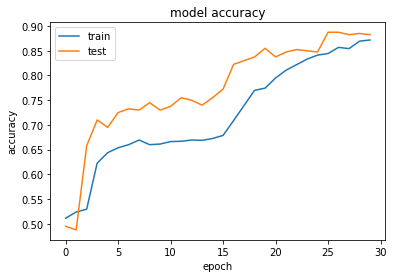

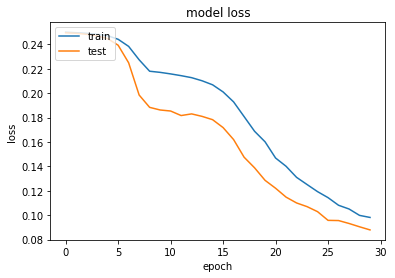

In [30]:
from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
# batch size = 16, 32
# categorical cross entropy
# nestrov = False
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16

Train on 1600 samples, validate on 400 samples
Epoch 1/25
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6917 - acc: 0.5172 - val_loss: 0.6873 - val_acc: 0.4875
Epoch 2/25
1600/1600 [==============================] - 1s 636us/step - loss: 0.6697 - acc: 0.6416 - val_loss: 0.5724 - val_acc: 0.7388
Epoch 3/25
1600/1600 [==============================] - 1s 630us/step - loss: 0.6258 - acc: 0.6672 - val_loss: 0.5570 - val_acc: 0.7375
Epoch 4/25
1600/1600 [==============================] - 1s 635us/step - loss: 0.6074 - acc: 0.6619 - val_loss: 0.5100 - val_acc: 0.7738
Epoch 5/25
1600/1600 [==============================] - 1s 637us/step - loss: 0.5473 - acc: 0.7291 - val_loss: 0.4328 - val_acc: 0.8438
Epoch 6/25
1600/1600 [==============================] - 1s 633us/step - loss: 0.4635 - acc: 0.7875 - val_loss: 0.3838 - val_acc: 0.8425
Epoch 7/25
1600/1600 [==============================] - 1s 640us/step - loss: 0.3970 - acc: 0.8200 - val_loss: 0.3370 - val_acc: 0.8738
Epo

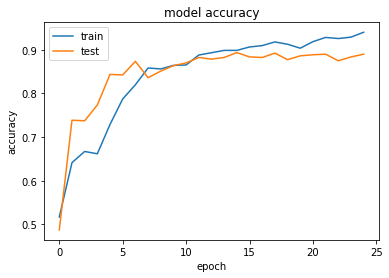

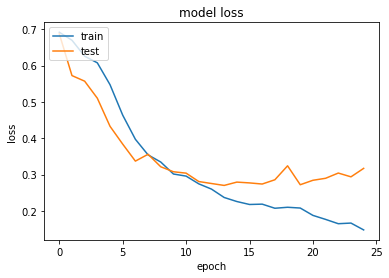

In [34]:
from keras import optimizers


MODEL_FIRST = 'Pong'
MODEL_END = time.asctime( time.localtime(time.time()))
MODEL_NAME = '{}_{}.h5'.format(MODEL_FIRST,MODEL_END)
#MODEL_NAME

# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=5)

# convert class vectors to binary class matricies for use in catagorical_crossentropy loss below
# number of action classifications
classifications = 2
y_train = keras.utils.to_categorical(y_train, classifications)
y_test = keras.utils.to_categorical(y_test, classifications)

#reference:-https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
# CNN model


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# initiate RMSprop optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
# batch size = 16, 32
# categorical cross entropy
# nestrov = False
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train,
              batch_size=16,
              epochs=25,
              validation_data=(x_test, y_test),
              shuffle=True)
#save weights post training

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resnet , vgg-16